In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
import umap
import pacmap
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

c:\Users\laure\anaconda3\envs\APC_ENV\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("wdbc.csv")

In [3]:
df.drop(df.columns[0], axis=1, inplace=True)

In [4]:
labels = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
def apply_clustering(X_embedded, method):
    params = clustering_params.get(method, {})
    kmeans = KMeans(**params.get("KMeans", {"n_clusters": 2, "random_state": 42, "n_init": 10}))
    dbscan = DBSCAN(**params.get("DBSCAN", {"eps": 0.5, "min_samples": 5}))
    agglo = AgglomerativeClustering(n_clusters=2)
    
    kmeans_labels = kmeans.fit_predict(X_embedded)
    dbscan_labels = dbscan.fit_predict(X_embedded)
    agglo_labels = agglo.fit_predict(X_embedded)
    
    return kmeans_labels, dbscan_labels, agglo_labels


In [7]:
clustering_params = {
    "PCA": {
        "KMeans": {"n_clusters": 2, "random_state": 42, "n_init": 10},
        "DBSCAN": {"eps": 0.8, "min_samples": 8}
    },
    "t-SNE": {
        "KMeans": {"n_clusters": 2, "random_state": 42, "n_init": 10},
        "DBSCAN": {"eps": 2, "min_samples": 6}
    },
    "UMAP": {
        "KMeans": {"n_clusters": 2, "random_state": 42, "n_init": 10},
        "DBSCAN": {"eps": 0.48, "min_samples": 8}
    },
    "PaCMAP": {
        "KMeans": {"n_clusters": 2, "random_state": 42, "n_init": 10},
        "DBSCAN": {"eps": 0.9, "min_samples": 8}
    },
    "Isomap": {
        "KMeans": {"n_clusters": 2, "random_state": 42, "n_init": 10},
        "DBSCAN": {"eps": 0.9, "min_samples": 8}
    },
    "LLE": {
        "KMeans": {"n_clusters": 2, "random_state": 42, "n_init": 10},
        "DBSCAN": {"eps": 1, "min_samples": 8}
    }
}

In [8]:
def plot_clusters(X_embedded, kmeans_labels, dbscan_labels, agglo_labels, title):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    axes[0].scatter(X_embedded[:, 0], X_embedded[:, 1], c=kmeans_labels, cmap="coolwarm", alpha=0.7)
    axes[0].set_title(f"{title} - K-Means")

    axes[1].scatter(X_embedded[:, 0], X_embedded[:, 1], c=dbscan_labels, cmap="coolwarm", alpha=0.7)
    axes[1].set_title(f"{title} - DBSCAN")
    
    axes[2].scatter(X_embedded[:, 0], X_embedded[:, 1], c=agglo_labels, cmap="coolwarm", alpha=0.7)
    axes[2].set_title(f"{title} - Agglomerative")
    
    plt.show()

In [9]:
silhouette_scores = {}


In [10]:
# Dimensionality Reduction and Clustering Methods
methods = {
    "PCA": PCA(n_components=2),
    "t-SNE": TSNE(n_components=2, random_state=42),
    "UMAP": umap.UMAP(n_components=2, random_state=42),
    "PaCMAP": pacmap.PaCMAP(n_components=2, random_state=42),
    "Isomap": Isomap(n_components=2),
    "LLE": LocallyLinearEmbedding(n_components=2)
}

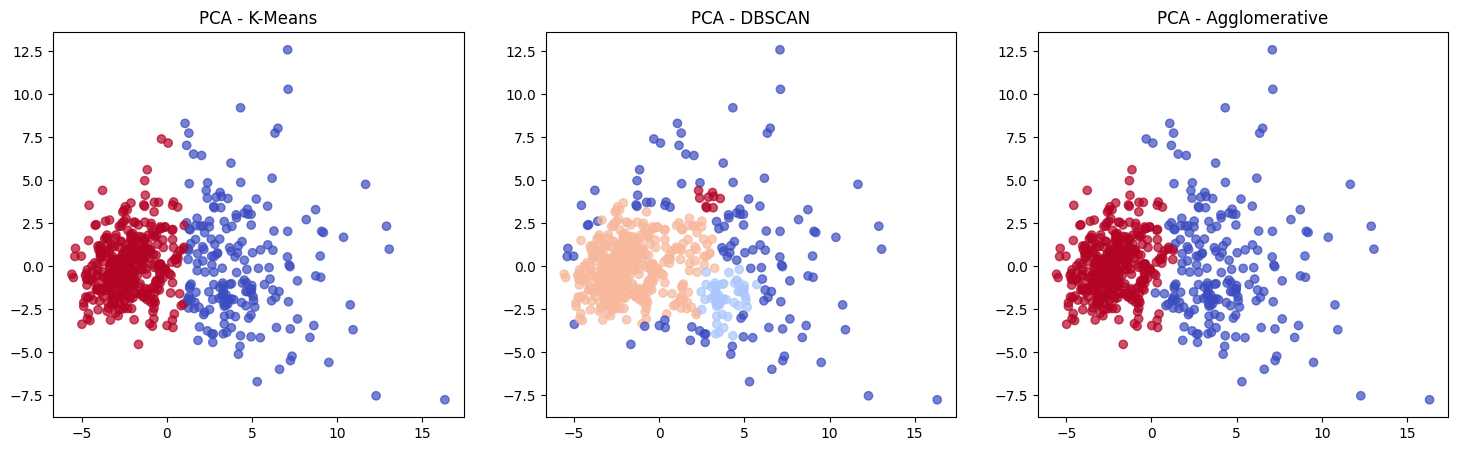

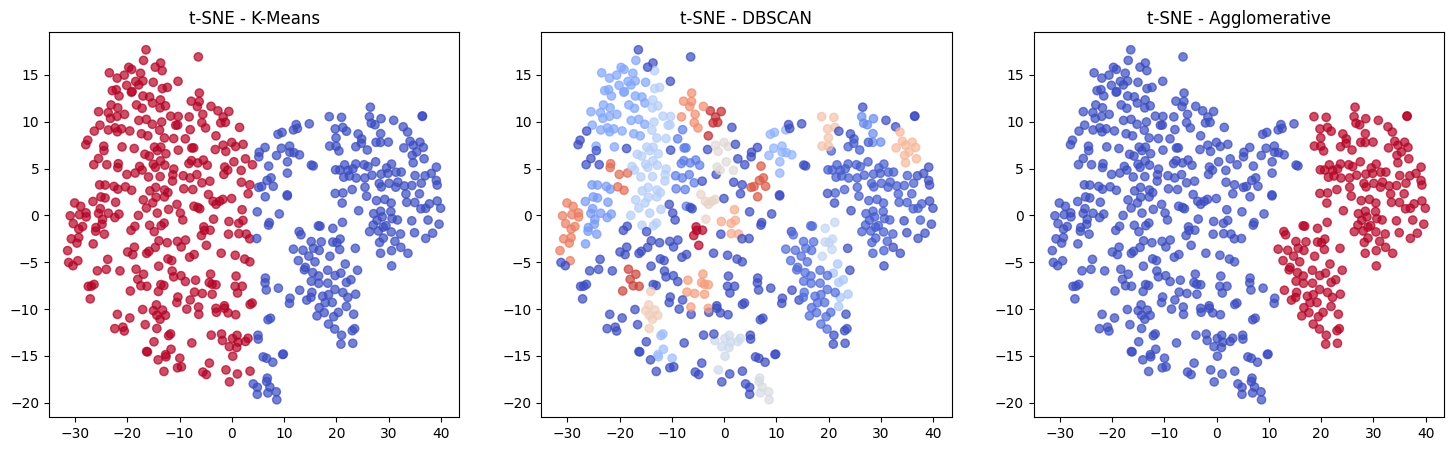

c:\Users\laure\anaconda3\envs\APC_ENV\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\laure\anaconda3\envs\APC_ENV\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


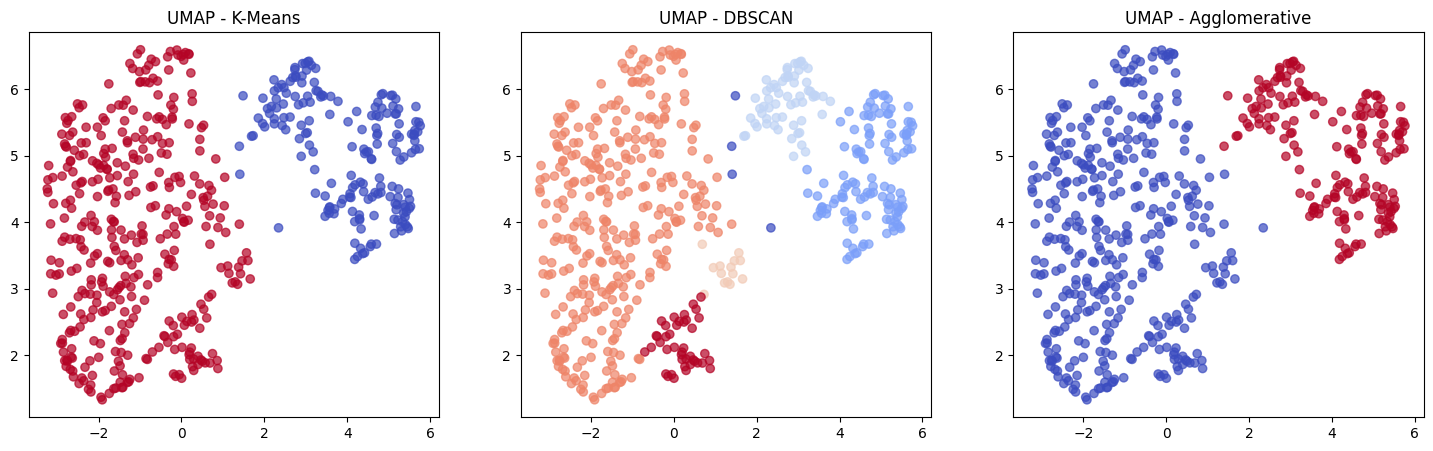

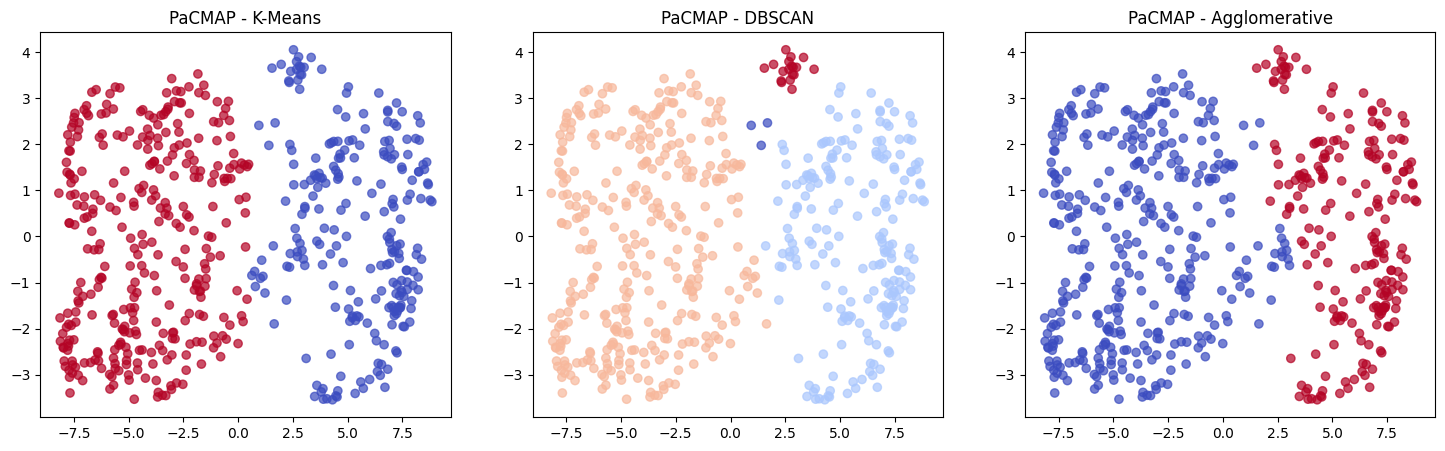

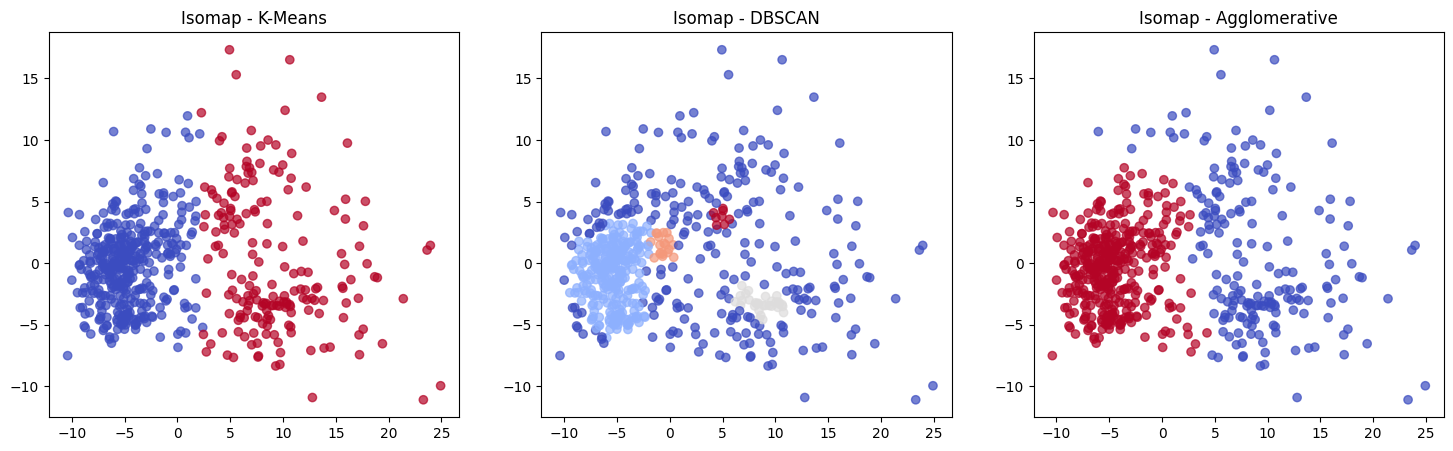

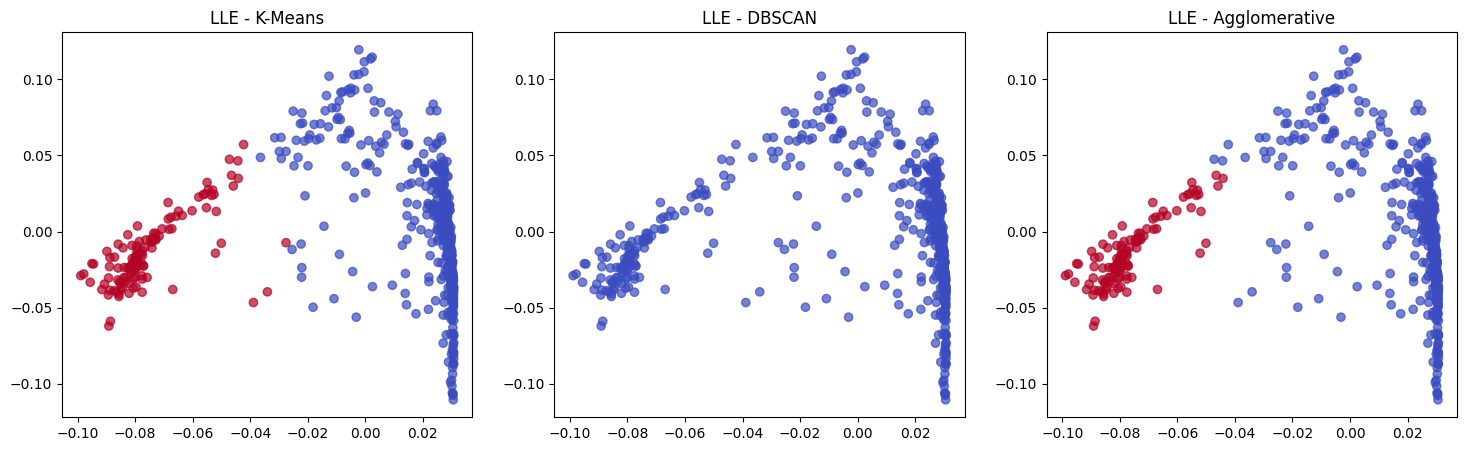

In [11]:
for method, reducer in methods.items():
    X_embedded = reducer.fit_transform(X_scaled)
    kmeans_labels, dbscan_labels, agglo_labels = apply_clustering(X_embedded, method)
    plot_clusters(X_embedded, kmeans_labels, dbscan_labels, agglo_labels, method)
    
    silhouette_scores[f"{method} - KMeans"] = silhouette_score(X_embedded, kmeans_labels)
    silhouette_scores[f"{method} - DBSCAN"] = silhouette_score(X_embedded, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
    silhouette_scores[f"{method} - Agglomerative"] = silhouette_score(X_embedded, agglo_labels)


In [12]:
print("\nSilhouette Scores for Clustering Methods:")
for method, score in silhouette_scores.items():
   print(f"{method}: {score:.4f}")


Silhouette Scores for Clustering Methods:
PCA - KMeans: 0.5085
PCA - DBSCAN: 0.2683
PCA - Agglomerative: 0.5046
t-SNE - KMeans: 0.5313
t-SNE - DBSCAN: -0.0452
t-SNE - Agglomerative: 0.5182
UMAP - KMeans: 0.5896
UMAP - DBSCAN: 0.2652
UMAP - Agglomerative: 0.5890
PaCMAP - KMeans: 0.5875
PaCMAP - DBSCAN: 0.2786
PaCMAP - Agglomerative: 0.5644
Isomap - KMeans: 0.5535
Isomap - DBSCAN: -0.0247
Isomap - Agglomerative: 0.5467
LLE - KMeans: 0.5360
LLE - DBSCAN: -1.0000
LLE - Agglomerative: 0.5360


Insights from Clustering Results:

- Best Overall Combination: UMAP & KMeans (Score: 0.5896) showed the best clustering separation.
-Worst Performance: LLE & DBSCAN (Score: -1.0000) was the worst, likely due to LLE distorting the data structure.
- DBSCAN: had the lowest silhouette scores, suggesting it struggled with noise and density-based clustering in this dataset.
- t-SNE & PaCMAP: These performed well with KMeans & Agglomerative but were inconsistent with DBSCAN.
